# Coronary Heart Disease (CHD) Prediction Using Logistic Regression

World Health Organization has estimated 12 million deaths occur worldwide, every year due to Heart diseases. Half the deaths in the United States and other developed countries are due to cardio vascular diseases. The early prognosis of cardiovascular diseases can aid in making decisions on lifestyle changes in high risk patients and in turn reduce the complications. This research intends to pinpoint the most relevant/risk factors of heart disease as well as predict the overall risk using logistic regression

### Data Preparation

#### Source

The dataset is publically available on the Kaggle website, and it is from an on-going cardiovascular study on residents of the town of Framingham, Massachusetts. The classification goal is to predict whether the patient has 10-year risk of future coronary heart disease (CHD).The dataset provides the patients’ information. It includes over 4,000 records and 15 attributes.

Coronary Heart Disease (CHD)

http://www.who.int/mediacentre/factsheets/fs317/en/


#### Variables
each attribute is a potential risk factor. There are demographic, behavioural and medical risk factors.

#### Demographic
    • Sex: male (1) or female (0) (Nominal)
    • Age: Age of the patient;
    (Continuous - Although the recorded ages have been truncated to whole numbers, the concept of age is continuous)

#### Behavioural
    • Education: 0: Less than High School and High School degrees, 1: College Degree and Higher
    • Current Smoker: whether or not the patient is a current smoker (Nominal/Binary)
    • Cigs Per Day: the number of cigarettes that the person smoked on average in one day.
    (can be considered continuous as one can have any number of cigarettes, even half a cigarette.)

#### Medical( history)
    • BP Meds: whether or not the patient was on blood pressure medication (Nominal/Binary)
    • Prevalent Stroke: whether or not the patient had previously had a stroke (Nominal/Binary)
    • Prevalent Hyp: whether or not the patient was hypertensive (Nominal/Binary)
    • Diabetes: whether or not the patient had diabetes (Nominal/Binary)

#### Medical(current)
    • Tot Chol: total cholesterol level (Continuous)
    • Sys BP: systolic blood pressure (Continuous)
    • Dia BP: diastolic blood pressure (Continuous)
    • BMI: Body Mass Index (Continuous)
    • Heart Rate: heart rate 
    (Continuous - In medical research, variables such as heart rate though in fact discrete, yet are considered 
    continuous because of large number of possible values.)
    • Glucose: glucose level (Continuous) 

#### Predict variable (desired target)
    • 10 year risk of coronary heart disease CHD (binary: “1”, means “Yes”, “0” means “No”)


In [70]:
# Import all the required model/library

import pandas as pd 
import numpy as np 
from sklearn.preprocessing import StandardScaler 
from sklearn.linear_model  import  LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.metrics import  roc_curve, roc_auc_score

#Data visualization libraries
import matplotlib.pyplot as plt
import seaborn as sns
from plotly.offline import iplot
import plotly as py
import plotly.tools as tls
import cufflinks as cf #Supporting library for plotly 
py.offline.init_notebook_mode(connected=True) #Turning on notebook mode 
cf.go_offline()

sns.set(style="darkgrid")

# Load the dataset

In [71]:
data = pd.read_csv("framingham.csv",sep=",") # Reading the Data
data.head()

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,4.0,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,2.0,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1.0,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,3.0,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,3.0,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0


In [72]:
print(data.shape) #size of the dataset
print(f"Total number of rows in dataset are {data.shape[0]}")
print(f"Total number of columns in dataset are {data.shape[1]} ")

(4238, 16)
Total number of rows in dataset are 4238
Total number of columns in dataset are 16 


In [73]:
data.rename(columns={'male': 'Sex'}, inplace = True)

In [74]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4238 entries, 0 to 4237
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Sex              4238 non-null   int64  
 1   age              4238 non-null   int64  
 2   education        4133 non-null   float64
 3   currentSmoker    4238 non-null   int64  
 4   cigsPerDay       4209 non-null   float64
 5   BPMeds           4185 non-null   float64
 6   prevalentStroke  4238 non-null   int64  
 7   prevalentHyp     4238 non-null   int64  
 8   diabetes         4238 non-null   int64  
 9   totChol          4188 non-null   float64
 10  sysBP            4238 non-null   float64
 11  diaBP            4238 non-null   float64
 12  BMI              4219 non-null   float64
 13  heartRate        4237 non-null   float64
 14  glucose          3850 non-null   float64
 15  TenYearCHD       4238 non-null   int64  
dtypes: float64(9), int64(7)
memory usage: 529.9 KB


In [4]:
#data.select_dtypes(include=['object']).columns.tolist() # list of categorical columns 

In [5]:
#data.select_dtypes(exclude=['object']).columns.tolist() #numerical columns

In [75]:
data.describe()

,Sex,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
count,4238.000000,4238.000000,4133.000000,4238.000000,4209.000000,4185.000000,4238.000000,4238.000000,4238.000000,4188.000000,4238.000000,4238.000000,4219.000000,4237.000000,3850.000000,4238.000000
mean,0.429212,49.584946,1.978950,0.494101,9.003089,0.029630,0.005899,0.310524,0.025720,236.721585,132.352407,82.893464,25.802008,75.878924,81.966753,0.151958
std,0.495022,8.572160,1.019791,0.500024,11.920094,0.169584,0.076587,0.462763,0.158316,44.590334,22.038097,11.910850,4.080111,12.026596,23.959998,0.359023
min,0.000000,32.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,107.000000,83.500000,48.000000,15.540000,44.000000,40.000000,0.000000
25%,0.000000,42.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,206.000000,117.000000,75.000000,23.070000,68.000000,71.000000,0.000000
50%,0.000000,49.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,234.000000,128.000000,82.000000,25.400000,75.000000,78.000000,0.000000
75%,1.000000,56.000000,3.000000,1.000000,20.000000,0.000000,0.000000,1.000000,0.000000,263.000000,144.000000,89.875000,28.040000,83.000000,87.000000,0.000000
max,1.000000,70.000000,4.000000,1.000000,70.000000,1.000000,1.000000,1.000000,1.000000,696.000000,295.000000,142.500000,56.800000,143.000000,394.000000,1.000000


# Check the null values

<AxesSubplot:>

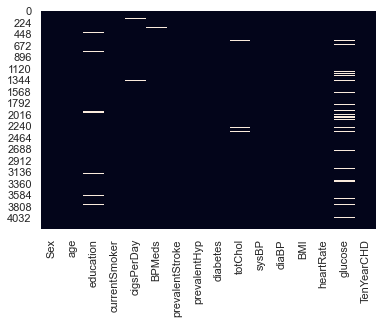

In [76]:
sns.heatmap(data.isnull(),cbar=False)

In [77]:
data.isnull().sum()

Sex                  0
age                  0
education          105
currentSmoker        0
cigsPerDay          29
BPMeds              53
prevalentStroke      0
prevalentHyp         0
diabetes             0
totChol             50
sysBP                0
diaBP                0
BMI                 19
heartRate            1
glucose            388
TenYearCHD           0
dtype: int64

In [78]:
print(f"Eduction null value percentage is:{data['education'].isnull().sum()/data.shape[0]*100:.2f}")
print(f"Cigarate per day null value percentage is:{data['cigsPerDay'].isnull().sum()/data.shape[0]*100:.2f}")
print(f"Blood pressure medication null value percentage is:{data['BPMeds'].isnull().sum()/data.shape[0]*100:.2f}")
print(f"Total cholesterol level null value percentage is:{data['totChol'].isnull().sum()/data.shape[0]*100:.2f}")
print(f"Body Mass Index null value percentage is:{data['BMI'].isnull().sum()/data.shape[0]*100:.2f}")
print(f"Heart rate null value percentage is:{data['heartRate'].isnull().sum()/data.shape[0]*100:.2f}")
print(f"Glucose level null value percentage is:{data['glucose'].isnull().sum()/data.shape[0]*100:.2f}")

#combine code for missing value calculation
#Missing_values_percent = 100*(data.isnull().sum()/(data.shape[0]))
#print(Missing_values_percent)

Eduction null value percentage is:2.48
Cigarate per day null value percentage is:0.68
Blood pressure medication null value percentage is:1.25
Total cholesterol level null value percentage is:1.18
Body Mass Index null value percentage is:0.45
Heart rate null value percentage is:0.02
Glucose level null value percentage is:9.16


# Observations

    1.Null value percentage of the eduction and glucose column is greater than 2%
    2.All the other features having null value percentage is less than 1%
    3.Imputation will be done in case of eduction and glucose column only 
    4.All the other null values in the features are going to drop 

# Distribution of data before imputation

C:\Users\dell\anaconda3\envs\PY38\lib\site-packages\seaborn\distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).

C:\Users\dell\anaconda3\envs\PY38\lib\site-packages\seaborn\distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).

C:\Users\dell\anaconda3\envs\PY38\lib\site-packages\seaborn\distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).

C:\Users\d

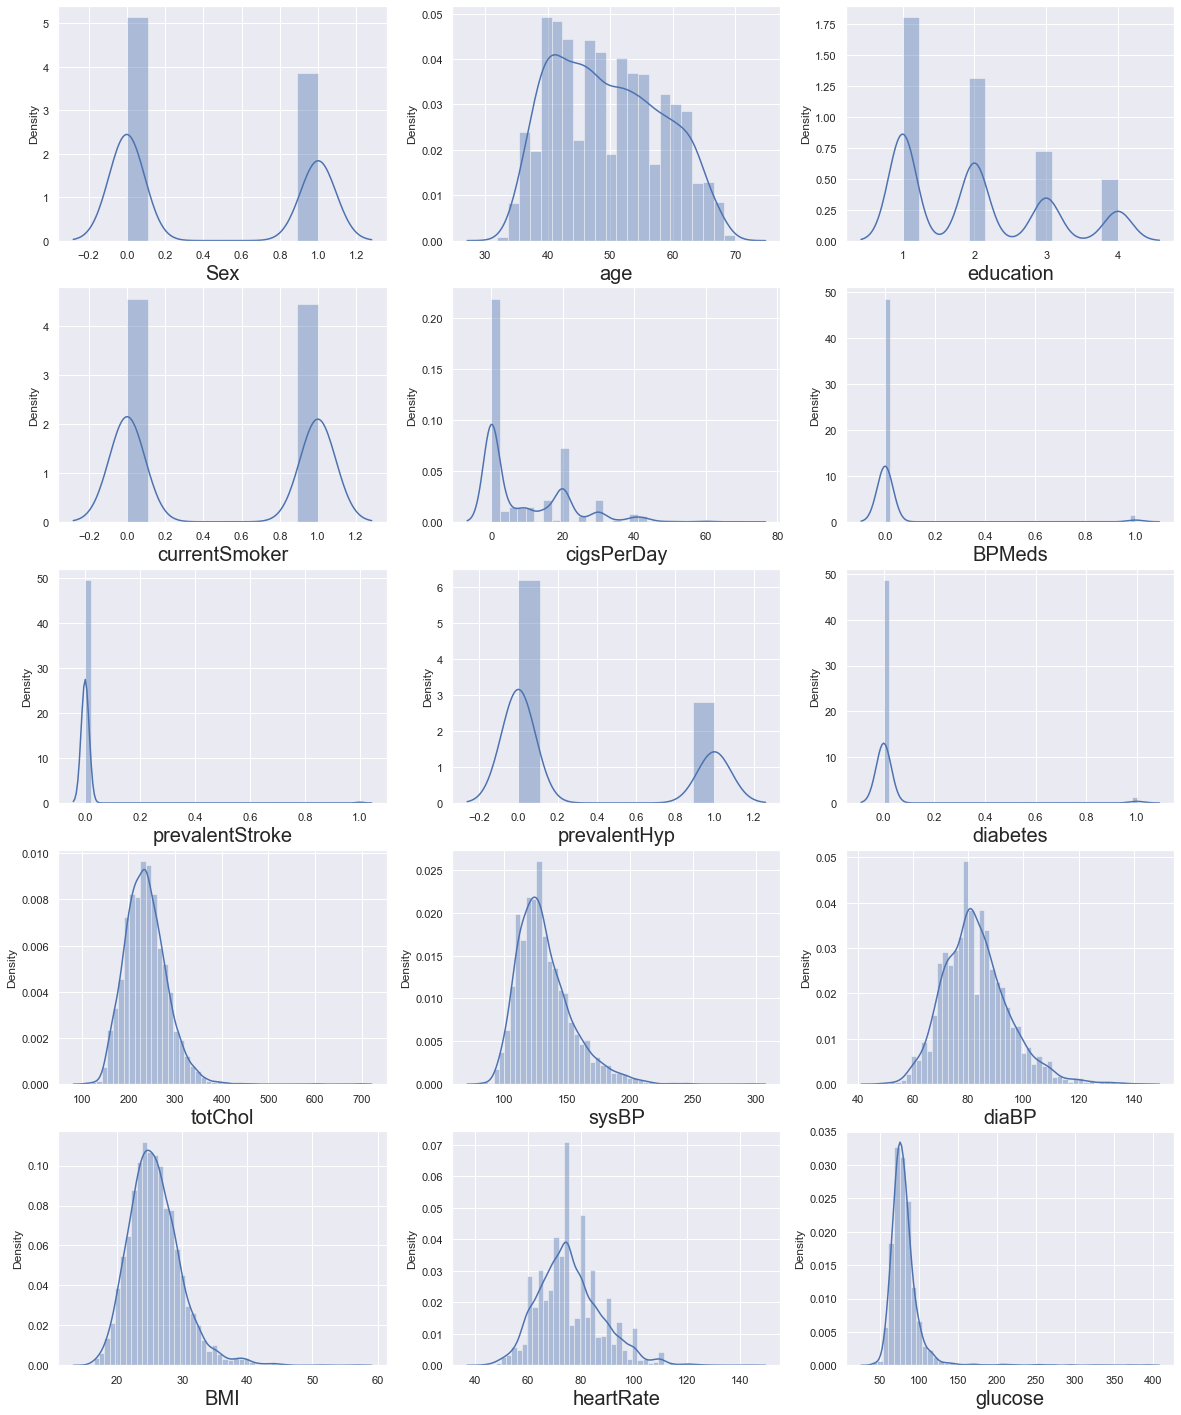

In [79]:
# let's see how data is distributed for every column
plt.figure(figsize=(20,25), facecolor='white')
plotnumber = 1

for column in data:
    if plotnumber<=15 :     # as there are 9 columns in the data
        ax = plt.subplot(5,3,plotnumber)
        sns.distplot(data[column])
        plt.xlabel(column,fontsize=20)
        #plt.ylabel('Salary',fontsize=20)
    plotnumber+=1
plt.show()

<AxesSubplot:>

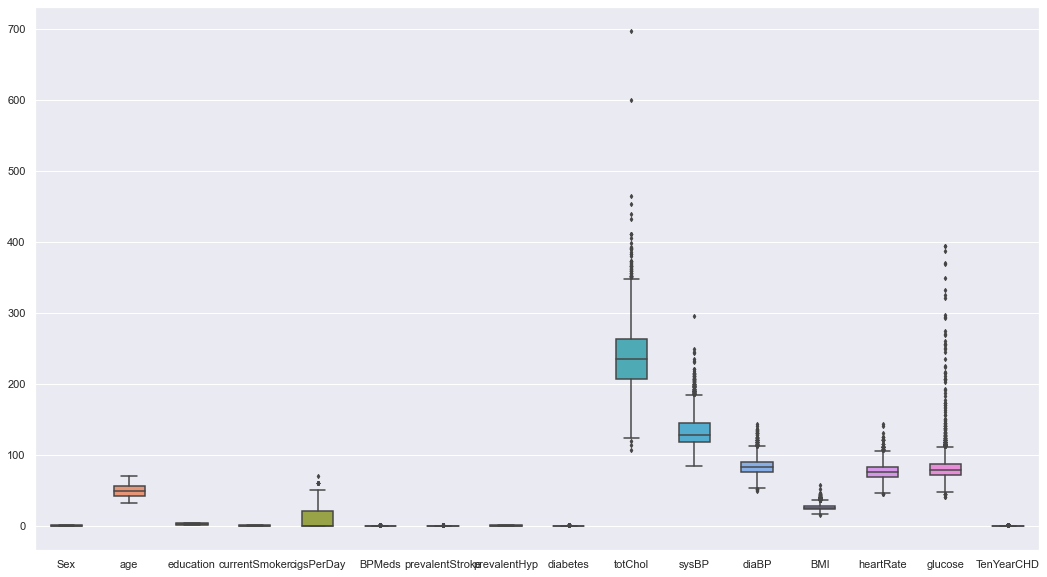

In [80]:
fig, ax = plt.subplots(figsize=(18,10))
sns.boxplot(data=data, width= 0.5,ax=ax,  fliersize=3)

# Observation

    1.Total cholesterol level, glucose level having more outliers as compare to others
    2. All the data distribution is right skewed, i.e. outliers are situated at high level (on right side) 

# Data Imputation/Data preprocessing

    1.Null value percentage of the eduction and glucose column is greater than 2%
    2.All the other features having null value percentage is less than 1%
    3.Imputation will be done in case of eduction and glucose column only 
    4.All the other null values in the features are going to drop 

In [81]:
data["education"].fillna(data["education"].mode()[0],inplace=True)
data = data.dropna(axis=0, subset=['cigsPerDay'])
#data["cigsPerDay"].fillna(data["cigsPerDay"].median(),inplace=True)
data = data.dropna(axis=0, subset=['BPMeds'])
#data["BPMeds"].fillna(data["BPMeds"].median(),inplace=True)
data = data.dropna(axis=0, subset=['totChol'])
#data["totChol"].fillna(data["totChol"].mode()[0],inplace=True)
data = data.dropna(axis=0, subset=['BMI'])
#data["BMI"].fillna(data["BMI"].mean(),inplace=True)
data["glucose"].fillna(data["glucose"].median(),inplace=True)
#data["heartRate"].dropna(axis=0,inplace=True)
data = data.dropna(axis=0, subset=['heartRate'])

## Check the null values after imputation

    After imputation there are no null values are present in dataset

In [82]:
data.isnull().sum()

Sex                0
age                0
education          0
currentSmoker      0
cigsPerDay         0
BPMeds             0
prevalentStroke    0
prevalentHyp       0
diabetes           0
totChol            0
sysBP              0
diaBP              0
BMI                0
heartRate          0
glucose            0
TenYearCHD         0
dtype: int64

C:\Users\dell\anaconda3\envs\PY38\lib\site-packages\seaborn\distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).

C:\Users\dell\anaconda3\envs\PY38\lib\site-packages\seaborn\distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).

C:\Users\dell\anaconda3\envs\PY38\lib\site-packages\seaborn\distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).

C:\Users\d

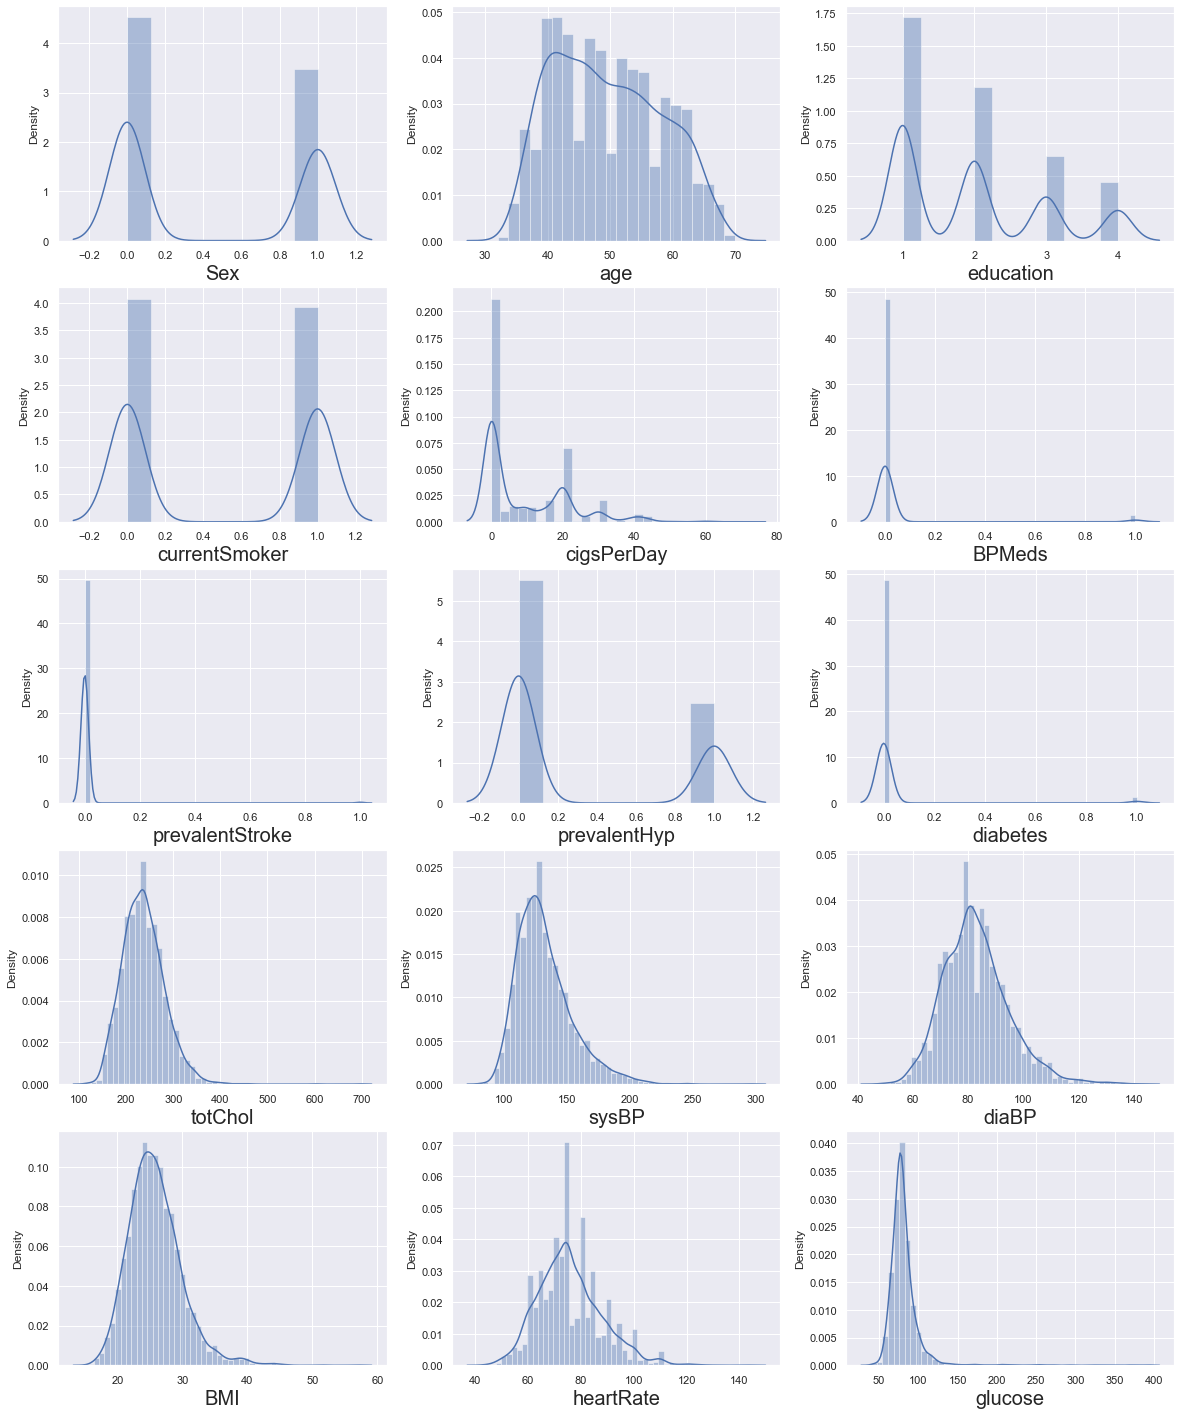

In [83]:
# let's see how data is distributed for every column
plt.figure(figsize=(20,25), facecolor='white')
plotnumber = 1

for column in data:
    if plotnumber<=15 :     # as there are 9 columns in the data
        ax = plt.subplot(5,3,plotnumber)
        sns.distplot(data[column])
        plt.xlabel(column,fontsize=20)
        #plt.ylabel('Salary',fontsize=20)
    plotnumber+=1
plt.show()

Null value data in the dataset is very small as compared to total dataset, so there is not major change in the distribution 

In [84]:
#cf.set_config_file(theme='solar')
#data.iplot(kind='box')

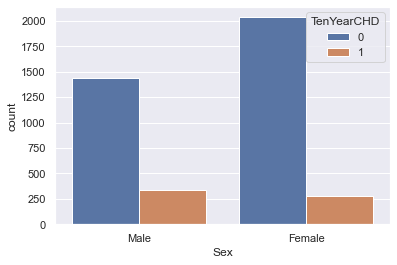

In [85]:
Datacopy=data.copy()
#Datacopy.rename(columns={'male': 'Sex'}, inplace = True)
Datacopy['Sex'] = Datacopy['Sex'].replace({0:'Female',1:'Male'})
sns.countplot(x="Sex", hue="TenYearCHD", data=Datacopy)
plt.show()

### 10 year risk of coronary heart disease (CHD) is found more in male than female 

Female    2311
Male      1777
Name: Sex, dtype: int64


<AxesSubplot:xlabel='Sex', ylabel='count'>

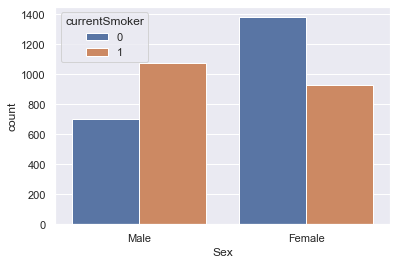

In [86]:
print(Datacopy['Sex'].value_counts())
sns.countplot(x="Sex", hue="currentSmoker", data=Datacopy)

### Male are current smoker than a female 

<AxesSubplot:xlabel='education', ylabel='count'>

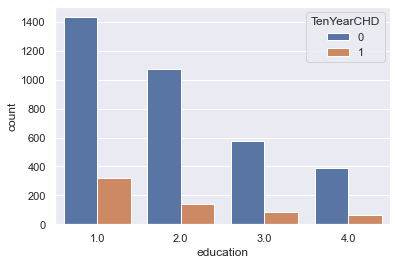

In [87]:
sns.countplot(x="education", hue="TenYearCHD", data=data)

#### 10 year risk of coronary heart disease (CHD) is found more in people whose having College Degree and Higher education

## Data correlation 

In [88]:
data.corr()

,Sex,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
Sex,1.000000,-0.023015,0.009779,0.199287,0.322215,-0.050173,-0.003798,0.009135,0.015020,-0.065808,-0.032574,0.060364,0.080700,-0.114814,0.006397,0.096060
age,-0.023015,1.000000,-0.159455,-0.215080,-0.190383,0.125478,0.044201,0.303271,0.104877,0.262911,0.389943,0.203561,0.134536,-0.011746,0.115010,0.226849
education,0.009779,-0.159455,1.000000,0.019589,0.008316,-0.009841,-0.026467,-0.079190,-0.034442,-0.023198,-0.125667,-0.064580,-0.138448,-0.053937,-0.031209,-0.053268
currentSmoker,0.199287,-0.215080,0.019589,1.000000,0.769987,-0.048777,-0.032002,-0.102312,-0.043453,-0.048494,-0.130159,-0.107839,-0.170169,0.057172,-0.052389,0.025360
cigsPerDay,0.322215,-0.190383,0.008316,0.769987,1.000000,-0.043939,-0.033362,-0.062994,-0.038379,-0.026620,-0.085891,-0.050922,-0.090474,0.071100,-0.052652,0.063060
BPMeds,-0.050173,0.125478,-0.009841,-0.048777,-0.043939,1.000000,0.125864,0.259934,0.054735,0.082272,0.258830,0.195667,0.102511,0.013895,0.052002,0.085618
prevalentStroke,-0.003798,0.044201,-0.026467,-0.032002,-0.033362,0.125864,1.000000,0.066541,0.009350,0.007670,0.054581,0.048708,0.030565,-0.011750,0.015865,0.044186
prevalentHyp,0.009135,0.303271,-0.079190,-0.102312,-0.062994,0.259934,0.066541,1.000000,0.076787,0.163659,0.693520,0.613649,0.304447,0.147475,0.083300,0.173806
diabetes,0.015020,0.104877,-0.034442,-0.043453,-0.038379,0.054735,0.009350,0.076787,1.000000,0.043748,0.102785,0.052245,0.086747,0.053966,0.610656,0.089132
totChol,-0.065808,0.262911,-0.023198,-0.048494,-0.026620,0.082272,0.007670,0.163659,0.043748,1.000000,0.211712,0.167580,0.121683,0.089519,0.045829,0.080676


<AxesSubplot:>

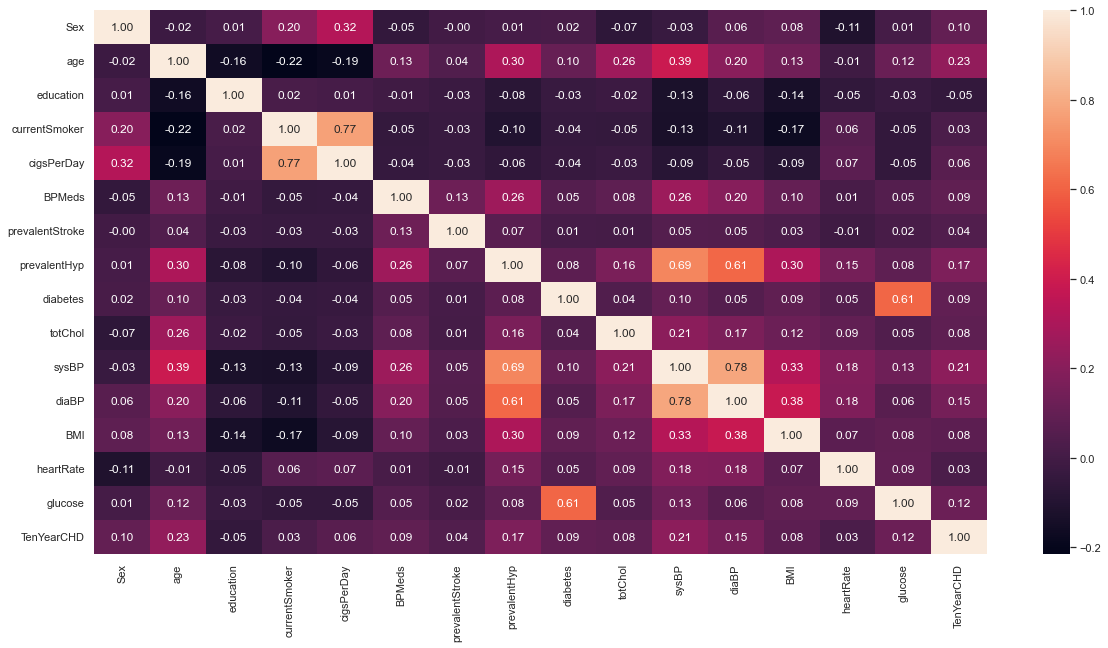

In [89]:
plt.figure(figsize=(20,10))
#sns.heatmap(cor,annot=True)
sns.heatmap(data.corr(),annot=True,annot_kws={"size": 12},fmt='.2f')

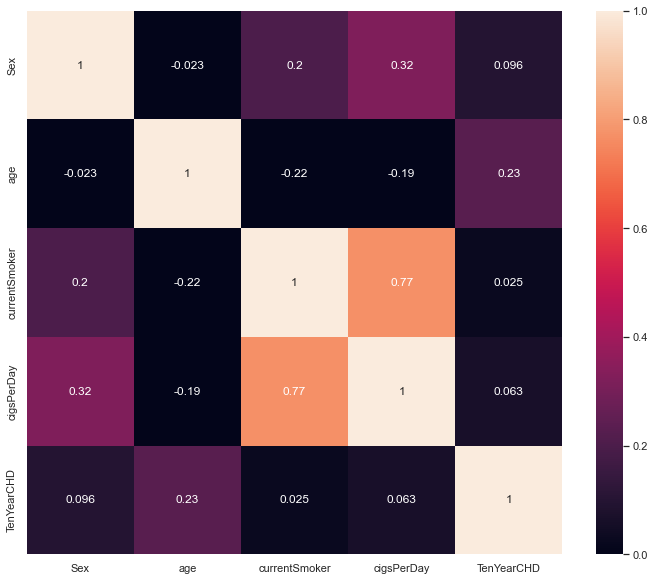

In [90]:
plt.figure(figsize = (12, 10))
sns.heatmap(data[["Sex", "age", "currentSmoker", "cigsPerDay", "TenYearCHD"]].corr(), vmin = 0, annot = True)
plt.show()

#### Positive correlation is found between;
    current smoker & cigarate per day
    age & CHD
    Sex & cigarate per day

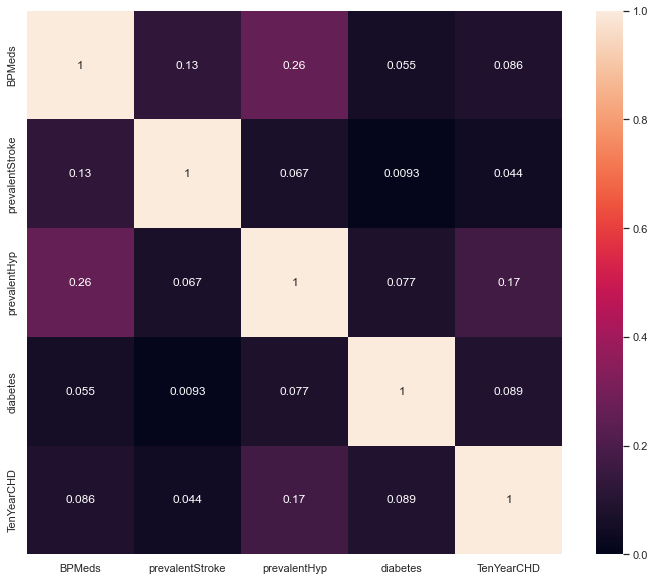

In [91]:
plt.figure(figsize = (12, 10))
sns.heatmap(data[["BPMeds", "prevalentStroke", "prevalentHyp", "diabetes", "TenYearCHD"]].corr(), vmin = 0, annot = True)
plt.show()

### Positive correlation is found between;
    BPMeds & PrevalentHyp (A person with BP medication having hypertensive symptoms)
    BPMeds & PrevalentStroke
    

## Select the features and the target 

In [92]:
x = data.drop(columns = ['TenYearCHD']) #features
y = data['TenYearCHD'] #target

## Data Standardization 

    1. The dataset contains different columns with different data units
    2. In logistic regression analysis, we required all the feature data in the same unit, so we are going to apply         
       standardization technique to the dataset  

In [93]:
scalar = StandardScaler()
X_scaled = scalar.fit_transform(x)

# Split the dataset into training and testing dataset

In [94]:
x_train,x_test,y_train,y_test = train_test_split(X_scaled,y, test_size= 0.25, random_state = 355)# training & testing 

## Build a logistic regression model

In [95]:
log_reg = LogisticRegression()
log_reg.fit(x_train,y_train) #Model is in learning phase using training dataset

LogisticRegression()

## Predicition of dependent variable (y) using testing dataset

In [96]:
y_pred = log_reg.predict(x_test)

# Model Accuracy

## Model accuracy calculation using accuracy_score

In [97]:
accuracy = accuracy_score(y_test,y_pred)
accuracy

0.837573385518591

    But for the classification problem, only accuracy from accuracy_score will not enough to give some 
    inference about the model accuracy
    So, for thi reason, we use confusion matrix and calculate the model accuracy in the form of precision,
    sensetivity(recall),f1-score

## Model accuracy calculation using confusion matrix

In [98]:
conf_mat = confusion_matrix(y_test,y_pred)
conf_mat

array([[848,   6],
       [160,   8]], dtype=int64)

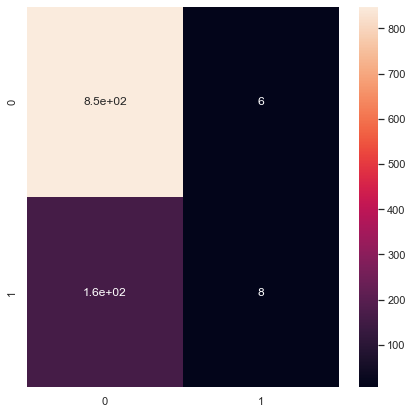

In [107]:
plt.figure(figsize = (7,7))
sns.heatmap(conf_mat, annot = True) #, cmap = "Blues"
plt.show()

In [108]:
true_positive = conf_mat[0][0]
false_positive = conf_mat[0][1]
false_negative = conf_mat[1][0]
true_negative = conf_mat[1][1]

In [109]:
Accuracy = (true_positive + true_negative) / (true_positive +false_positive + false_negative + true_negative)
Accuracy

0.837573385518591

In [110]:
# Precison
Precision = true_positive/(true_positive+false_positive)
Precision

0.9929742388758782

In [111]:
Recall = true_positive/(true_positive+false_negative)
Recall

0.8412698412698413

In [112]:
f1=2*((Precision * Recall )) /(Precision + Recall)
f1

0.9108485499462944

## Inference about the accuracy

    1. Precision is 99% means model will correctly label the outcome as 'yes'(1) i.e. it correctly predict the 
    10 year risk of coronary heart disease (CHD) 
    2.Recall (sensetivity) is 84% means model will correctly predict the CHD
    3.Accuracy is 83% means, model will correctly identified the CHD  

In [113]:
# Area Under Curve
auc = roc_auc_score(y_test, y_pred)
auc

0.5202966432474629

In [114]:
y_pred_prob = log_reg.predict_proba(x_test)
y_pred_prob

array([[0.96037162, 0.03962838],
       [0.78712868, 0.21287132],
       [0.98071705, 0.01928295],
       ...,
       [0.87029382, 0.12970618],
       [0.91709314, 0.08290686],
       [0.96938004, 0.03061996]])

In [115]:
y_pred_prob[:,1]

array([0.03962838, 0.21287132, 0.01928295, ..., 0.12970618, 0.08290686,
       0.03061996])

In [116]:
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob[:,1])

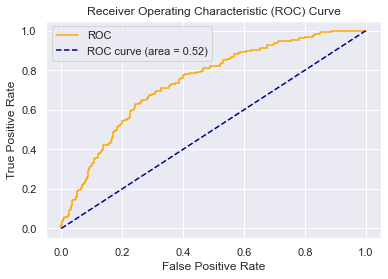

In [117]:
plt.plot(fpr, tpr, color='orange', label='ROC')
plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--',label='ROC curve (area = %0.2f)' % auc)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend()
plt.show()